# Chapter 1

In [1]:
import numpy as np

In [2]:
x = np.array([1, 2, 3, 4, 5, 6]).reshape((2, 3))

In [3]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
from scipy import sparse

In [5]:
eye = np.eye(4)
print(eye)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [6]:
sparse_matrix = sparse.csr_matrix(eye)
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [7]:
data = np.ones(4)
data

array([1., 1., 1., 1.])

In [8]:
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print(eye_coo)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

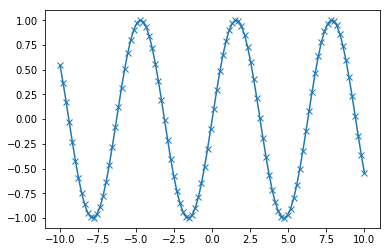

In [11]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker='x');

In [12]:
import pandas as pd

In [13]:
data = {'Name': ["John", "Anna", "Peter", "Linda"],
'Location' : ["New York", "Paris", "Berlin", "London"], 'Age' : [24, 13, 53, 33]
}

data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [14]:
import mglearn

In [15]:
import sklearn

In [16]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn

out = 'Python: {}\npandas: {}\nmatplotlib: {}\nNumPy: {}\nSciPy: {}\nIPython: {}\nscikit-learn: {}'
versions = [sys.version, pd.__version__, matplotlib.__version__, np.__version__, sp.__version__, IPython.__version__, sklearn.__version__]
print(out.format(*versions))

Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
pandas: 0.23.0
matplotlib: 2.2.2
NumPy: 1.14.3
SciPy: 1.1.0
IPython: 6.4.0
scikit-learn: 0.19.1


## Irises classification

In [17]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [18]:
print('Keys iris_dataset:\n{}'.format(iris_dataset.keys()))

Keys iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [19]:
print('Classes: {}'.format(iris_dataset['target_names']))

Classes: ['setosa' 'versicolor' 'virginica']


In [20]:
print('Features: {}'.format(iris_dataset['feature_names']))

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
print('Type of "data" array: {}'.format(type(iris_dataset['data'])))

Type of "data" array: <class 'numpy.ndarray'>


In [22]:
print('Shape of "data" array: {}'.format(iris_dataset['data'].shape))

Shape of "data" array: (150, 4)


In [23]:
print('First 5 rows of "data":\n{}'.format(iris_dataset['data'][:5]))

First 5 rows of "data":
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [24]:
print('Type of "target" array: {}'.format(type(iris_dataset['target'])))

Type of "target" array: <class 'numpy.ndarray'>


In [25]:
print('Shape of "target" array: {}'.format(iris_dataset['target'].shape))

Shape of "target" array: (150,)


In [26]:
print('Answers:\n{}'.format(iris_dataset['target']))

Answers:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [28]:
print('X_train shape: {}\ny_train shape: {}\n----\nX_test shape: {}\ny_test shape: {}'.format(X_train.shape, 
                                                                                              y_train.shape, 
                                                                                              X_test.shape, 
                                                                                              y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
----
X_test shape: (38, 4)
y_test shape: (38,)


In [29]:
import pandas as pd
import mglearn

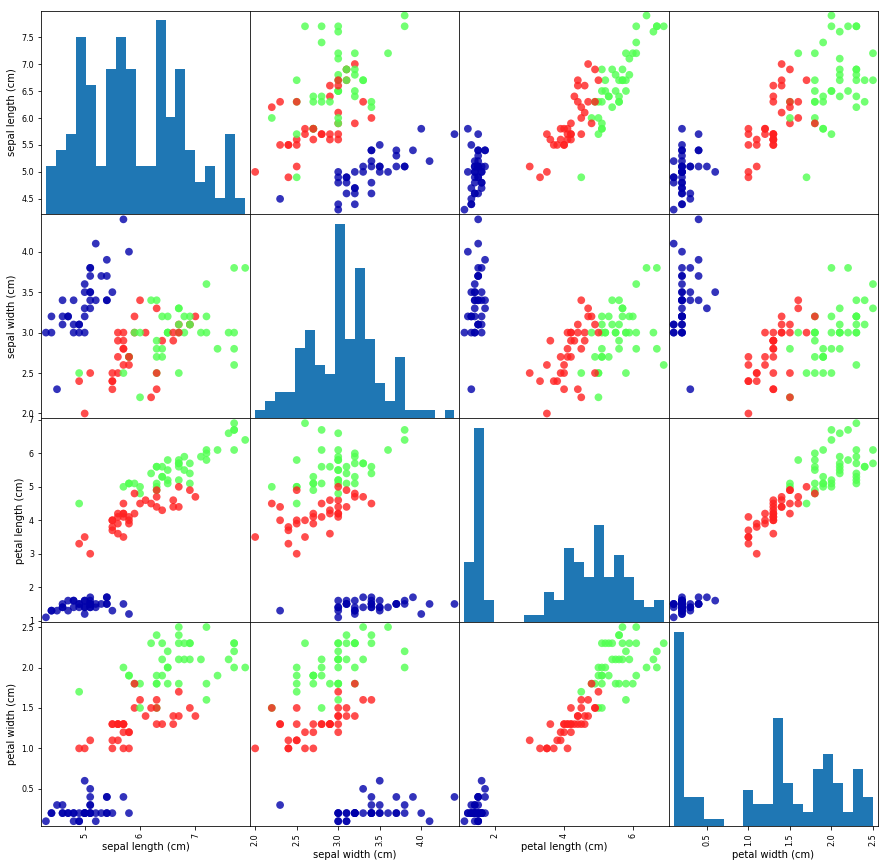

In [30]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
import numpy as np

In [34]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('Shape of X_new:', X_new.shape)

Shape of X_new: (1, 4)


In [35]:
prediction = knn.predict(X_new)
print('Prediction:', prediction)
print('Predicted label:', iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted label: ['setosa']


In [36]:
y_pred = knn.predict(X_test)
print('Test predictions:\n', y_pred)

Test predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [37]:
print('Test set accuracy: {:.2f}'.format(np.mean(y_test == y_pred)))

Test set accuracy: 0.97


In [38]:
print('Test set accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

Test set accuracy: 0.97


# Chapter 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import sklearn
import mglearn

In [2]:
%matplotlib inline

Array shape: (26, 2)


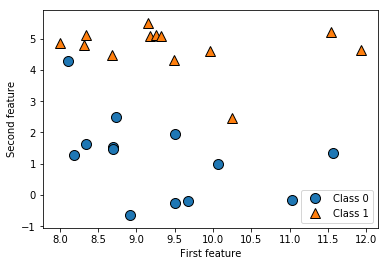

In [3]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('Array shape:', X.shape)

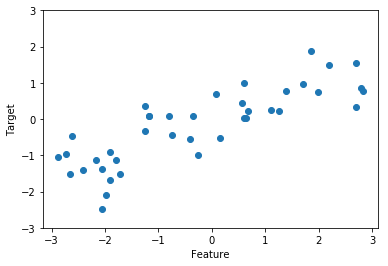

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target');

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('Keys of "cancer":\n', cancer.keys())

Keys of "cancer":
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
print(cancer.data.shape)

(569, 30)


In [7]:
print(cancer.target_names)

['malignant' 'benign']


In [8]:
print('Amount of data points for each class:\n', {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Amount of data points for each class:
 {'malignant': 212, 'benign': 357}


In [9]:
print("Features' names:\n", cancer.feature_names)

Features' names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [12]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [13]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


## 1. k-nearest neighbors

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
print("Test predictions:", clf.predict(X_test))

Test predictions: [1 0 1 0 1 0 0]


In [18]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


###### Decision boundary

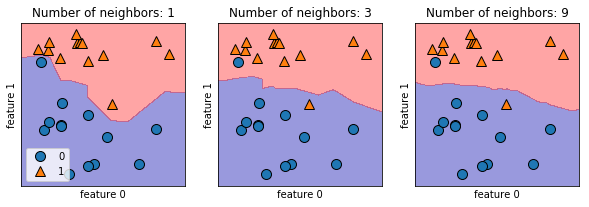

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Number of neighbors: {}".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

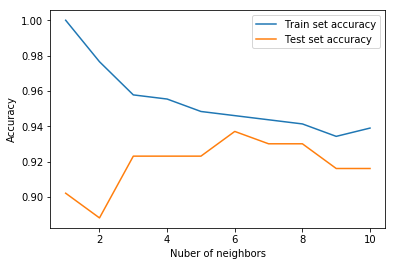

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_setting = range(1, 11)

for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))    
    
plt.plot(neighbors_setting, training_accuracy, label="Train set accuracy")
plt.plot(neighbors_setting, test_accuracy, label="Test set accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Nuber of neighbors")
plt.legend();

### k-nearest neighbors: regression

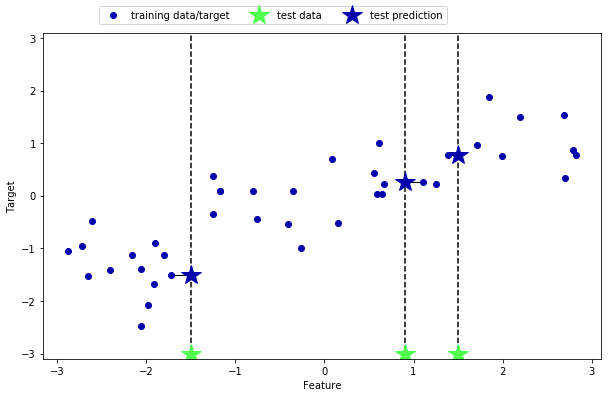

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

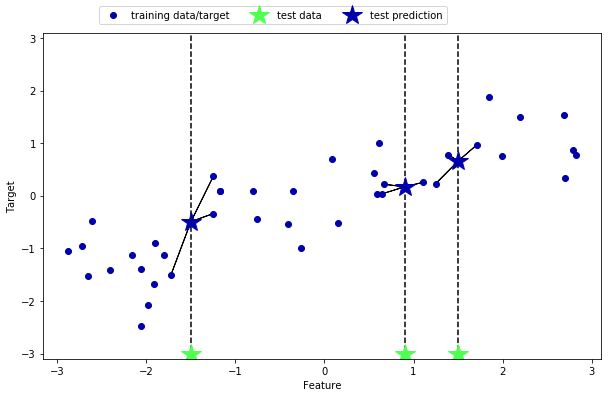

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [24]:
print("Test predicitons:\n", reg.predict(X_test))

Test predicitons:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [25]:
print("R^2 for test set: {:.2f}".format(reg.score(X_test, y_test)))

R^2 for test set: 0.83


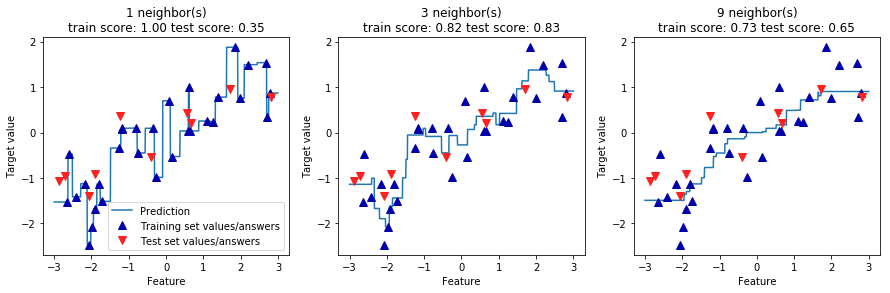

In [26]:
%matplotlib inline
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\ntrain score: {:.2f} test score: {:.2f}".format(n_neighbors,
                                                                                 reg.score(X_train, y_train),
                                                                                 reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target value")
axes[0].legend(["Prediction", "Training set values/answers", "Test set values/answers"], loc="best");

## 2. Linear models

## 2.1 Linear models for regression

w[0]: 0.393906  b: -0.031804


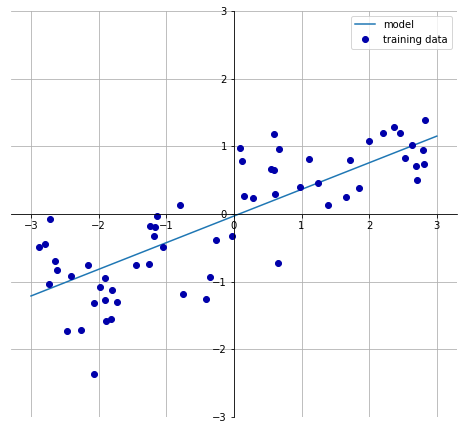

In [27]:
mglearn.plots.plot_linear_regression_wave()

### Linear regression (ordinary least squares (OLS))

In [28]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

Case with one feature:

$f(x) = w[0]*x[0] + b$

In [29]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [30]:
print("Training set accuracy: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(lr.score(X_test, y_test)))

Training set accuracy: 0.67
Test set accuracy: 0.66


Case with many features:

$f(x) = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b$

In [31]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print("Training set accuracy: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(lr.score(X_test, y_test)))

Training set accuracy: 0.95
Test set accuracy: 0.61


### Linear regression (Ridge)

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(ridge.score(X_test, y_test)))

Train set accuracy: 0.89
Test set accuracy: 0.75


In [34]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(ridge10.score(X_test, y_test)))

Train set accuracy: 0.79
Test set accuracy: 0.64


In [35]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(ridge01.score(X_test, y_test)))

Train set accuracy: 0.93
Test set accuracy: 0.77


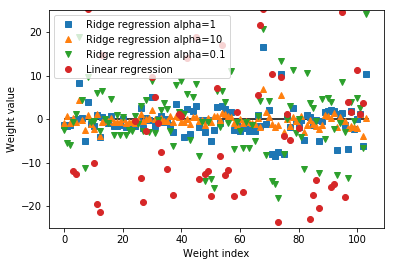

In [36]:
%matplotlib inline
plt.plot(ridge.coef_, 's', label="Ridge regression alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge regression alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge regression alpha=0.1")

plt.plot(lr.coef_, 'o', label="Linear regression")
plt.xlabel("Weight index")
plt.ylabel("Weight value")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend();

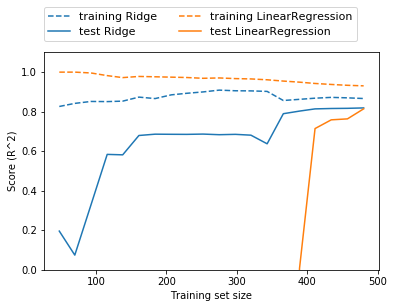

In [37]:
%matplotlib inline
mglearn.plots.plot_ridge_n_samples();

### Linear regression (Lasso)

Underfitting

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of used features: {}".format(np.sum(lasso.coef_ != 0)))

Train set accuracy: 0.29
Test set accuracy: 0.21
Number of used features: 4


Good

In [39]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of used features: {}".format(np.sum(lasso001.coef_ != 0)))

Train set accuracy: 0.90
Test set accuracy: 0.77
Number of used features: 33


Overfitting

In [40]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of used features: {}".format(np.sum(lasso00001.coef_ != 0)))

Train set accuracy: 0.95
Test set accuracy: 0.64
Number of used features: 94


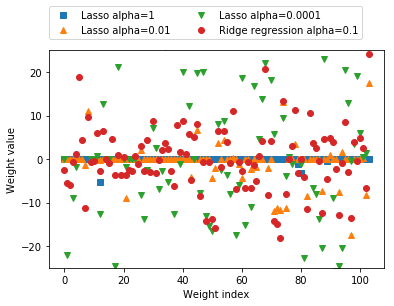

In [41]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge regression alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Weight index")
plt.ylabel("Weight value");

## 2.2 Linear models for classification

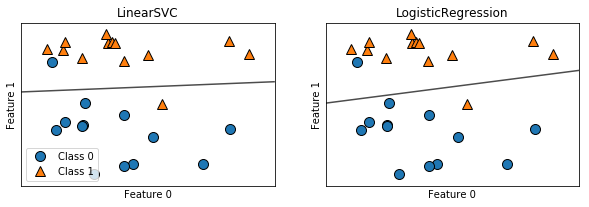

In [42]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(model.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(["Class 0", "Class 1"], loc=3);

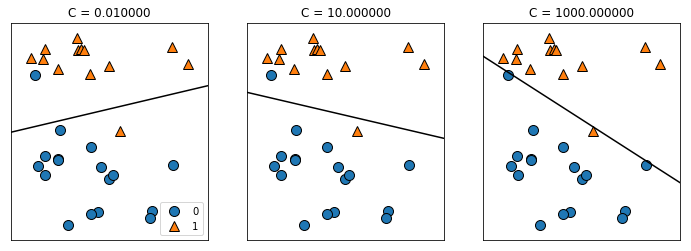

In [43]:
mglearn.plots.plot_linear_svc_regularization()

C = 1. Maybe underfitted here:

In [44]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Train set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Train set accuracy: 0.953
Test set accuracy: 0.958


C = 100. It becomes better:

In [45]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Train set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Train set accuracy: 0.972
Test set accuracy: 0.965


C = 0.01. Underfitted:

In [46]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Train set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Train set accuracy: 0.934
Test set accuracy: 0.930


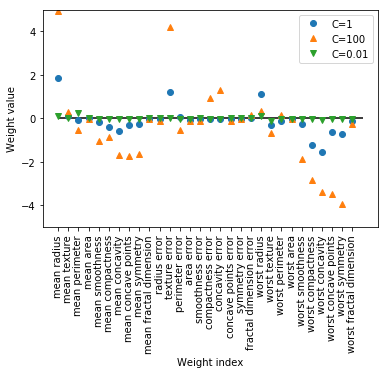

In [47]:
%matplotlib inline
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Weight index")
plt.ylabel("Weight value")
plt.legend();

The same as above but L1 regulatisation is used (some weights become equal to 0)

Train set accuracy for LogRegession l1 with C=0.001: 0.91
Test set accuracy for LogRegression l1 with C=0.001: 0.92
Train set accuracy for LogRegession l1 with C=1.000: 0.96
Test set accuracy for LogRegression l1 with C=1.000: 0.96
Train set accuracy for LogRegession l1 with C=100.000: 0.99
Test set accuracy for LogRegression l1 with C=100.000: 0.98


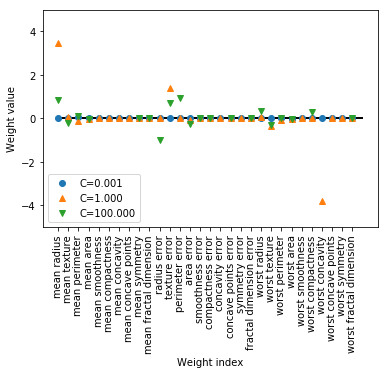

In [48]:
%matplotlib inline
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("Train set accuracy for LogRegession l1 with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test set accuracy for LogRegression l1 with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))

    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])
    plt.xlabel("Weight index")
    plt.ylabel("Weight value")
    plt.ylim(-5, 5)
    plt.legend(loc=3);

### Linear models for multiclass classifications

#### one-vs.-all

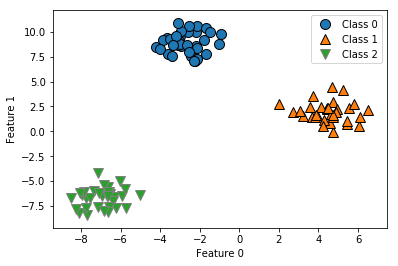

In [49]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"]);

There are 3 coefs - one for each class. (3, 2) And also there is separate array of intercepts for each class. (3,)

In [50]:
linear_svm = LinearSVC().fit(X, y)
print("Coef shape:", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

Coef shape: (3, 2)
Intercept shape: (3,)


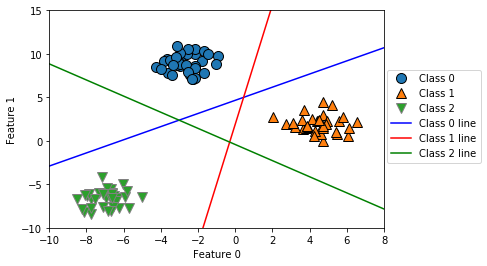

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 line", "Class 1 line", "Class 2 line"], loc=(1.01, 0.3));

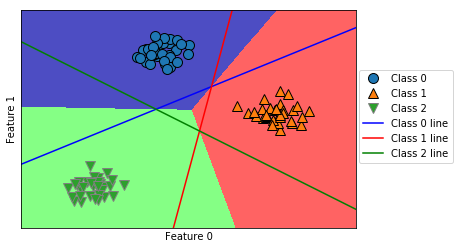

In [52]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 line", "Class 1 line", "Class 2 line"], loc=(1.01, 0.3));

## 3. Naive Bayes classifiers

In [53]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [54]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Feature frequences:\n", counts)

Feature frequences:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## 4. Decision trees

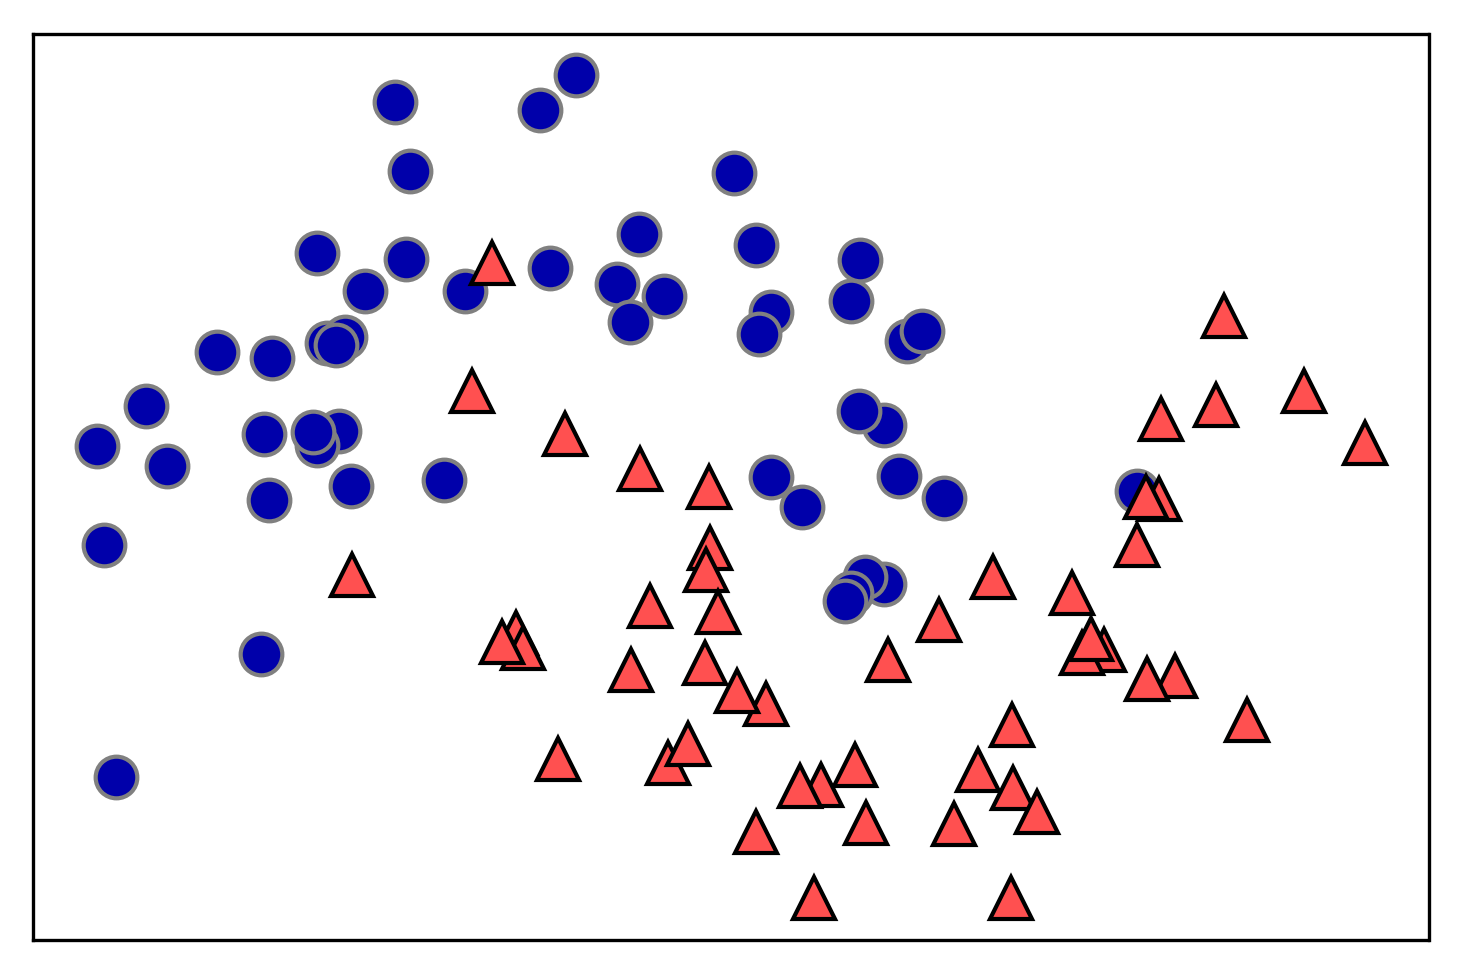
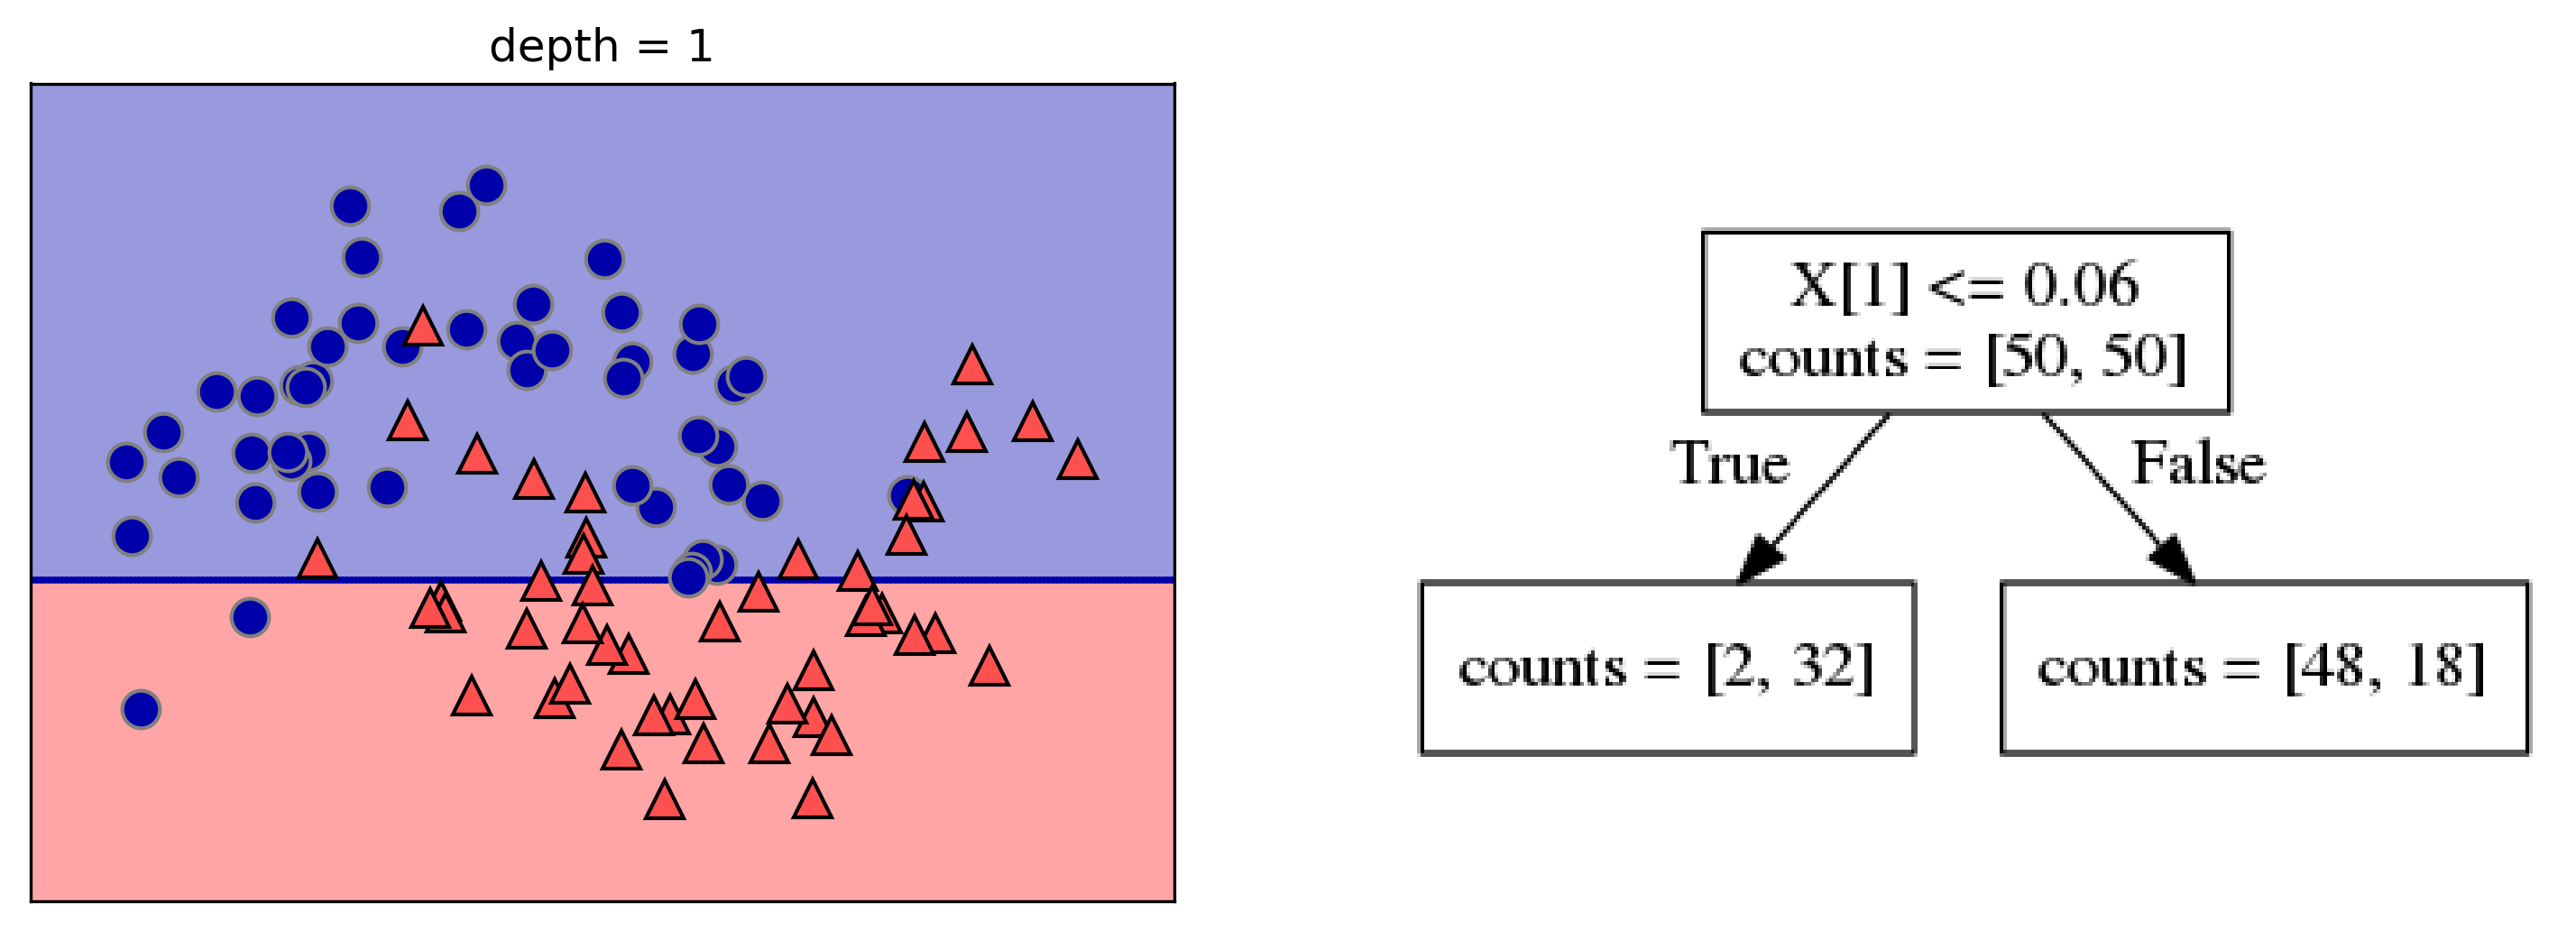
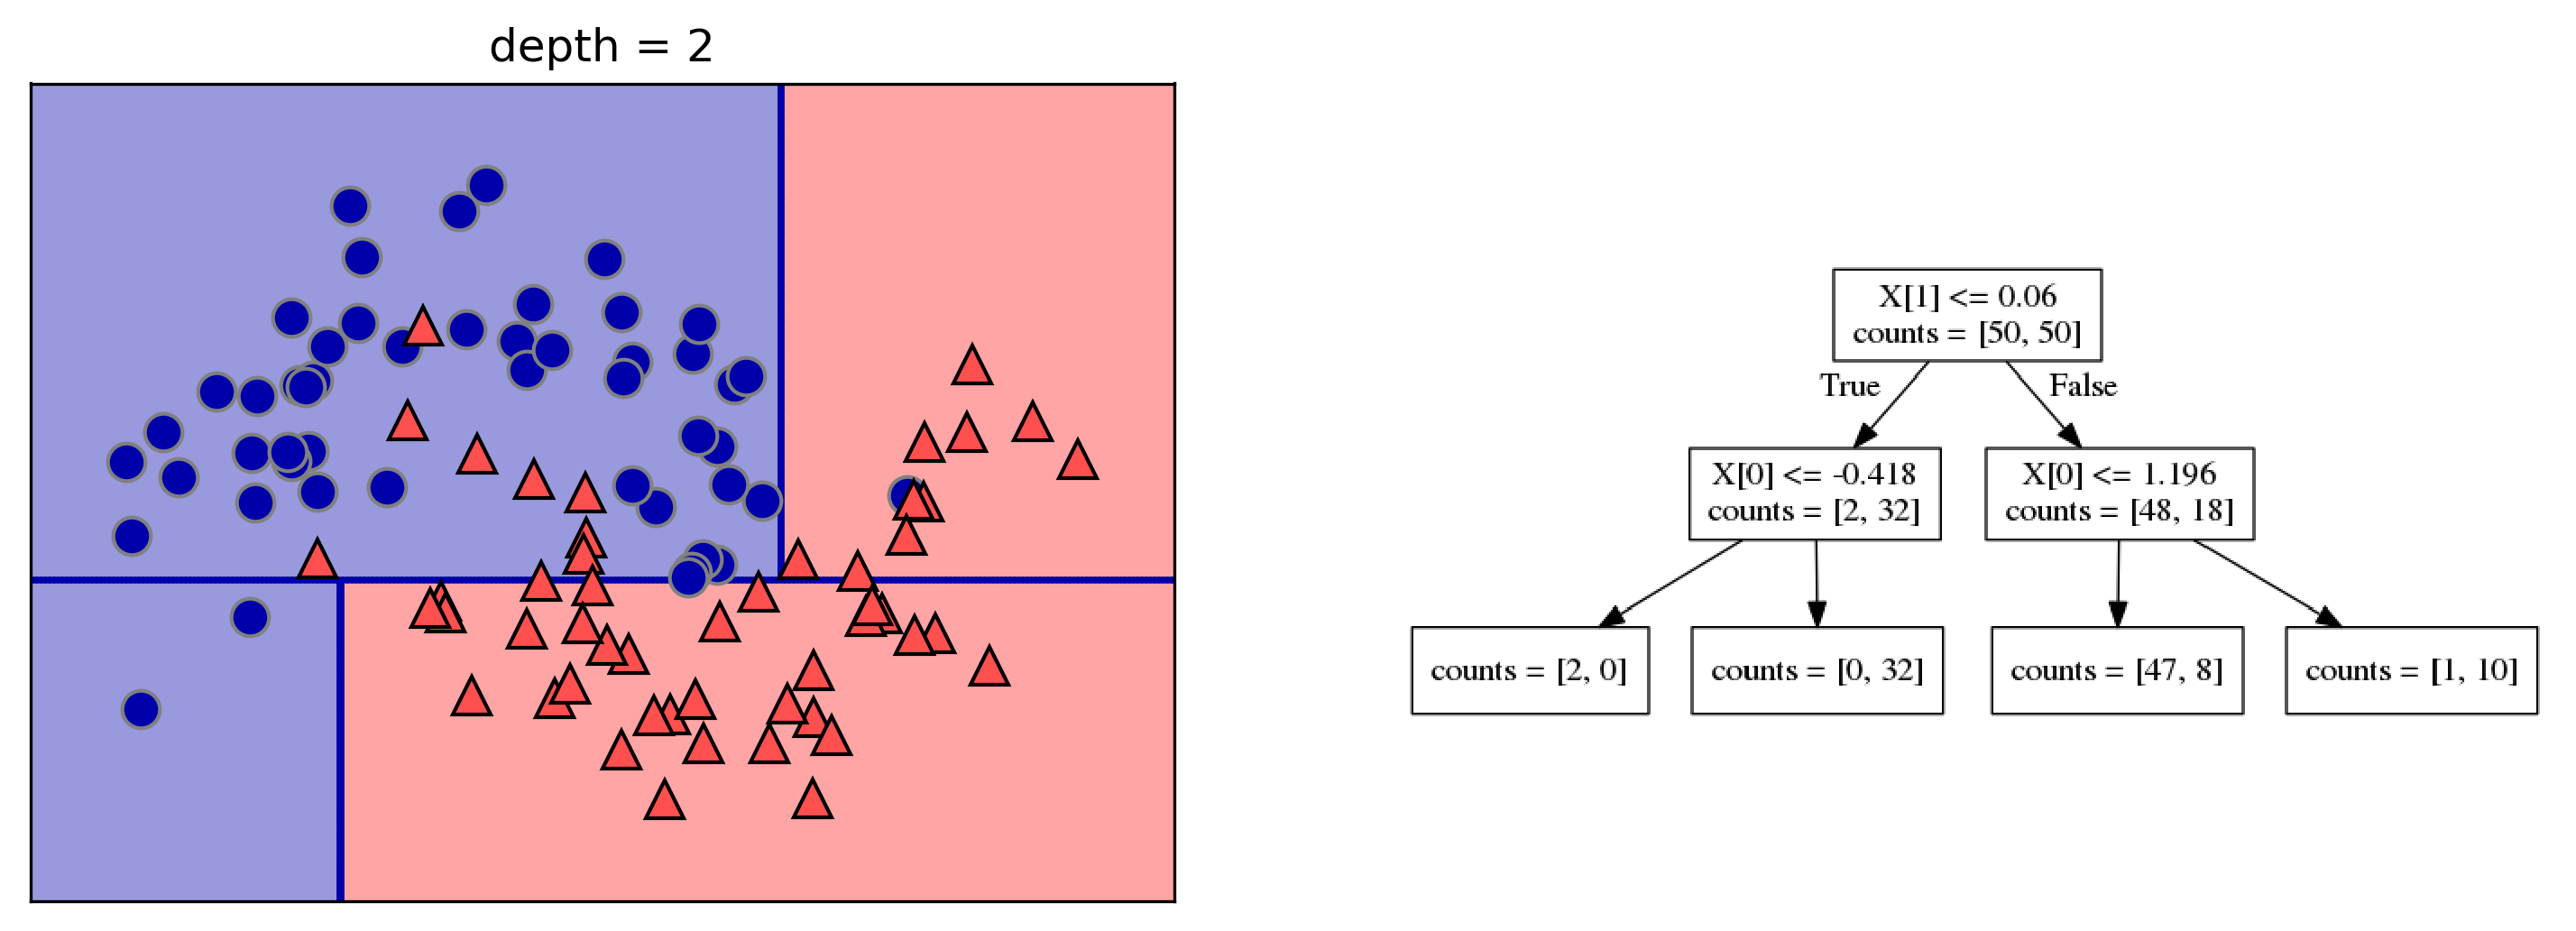
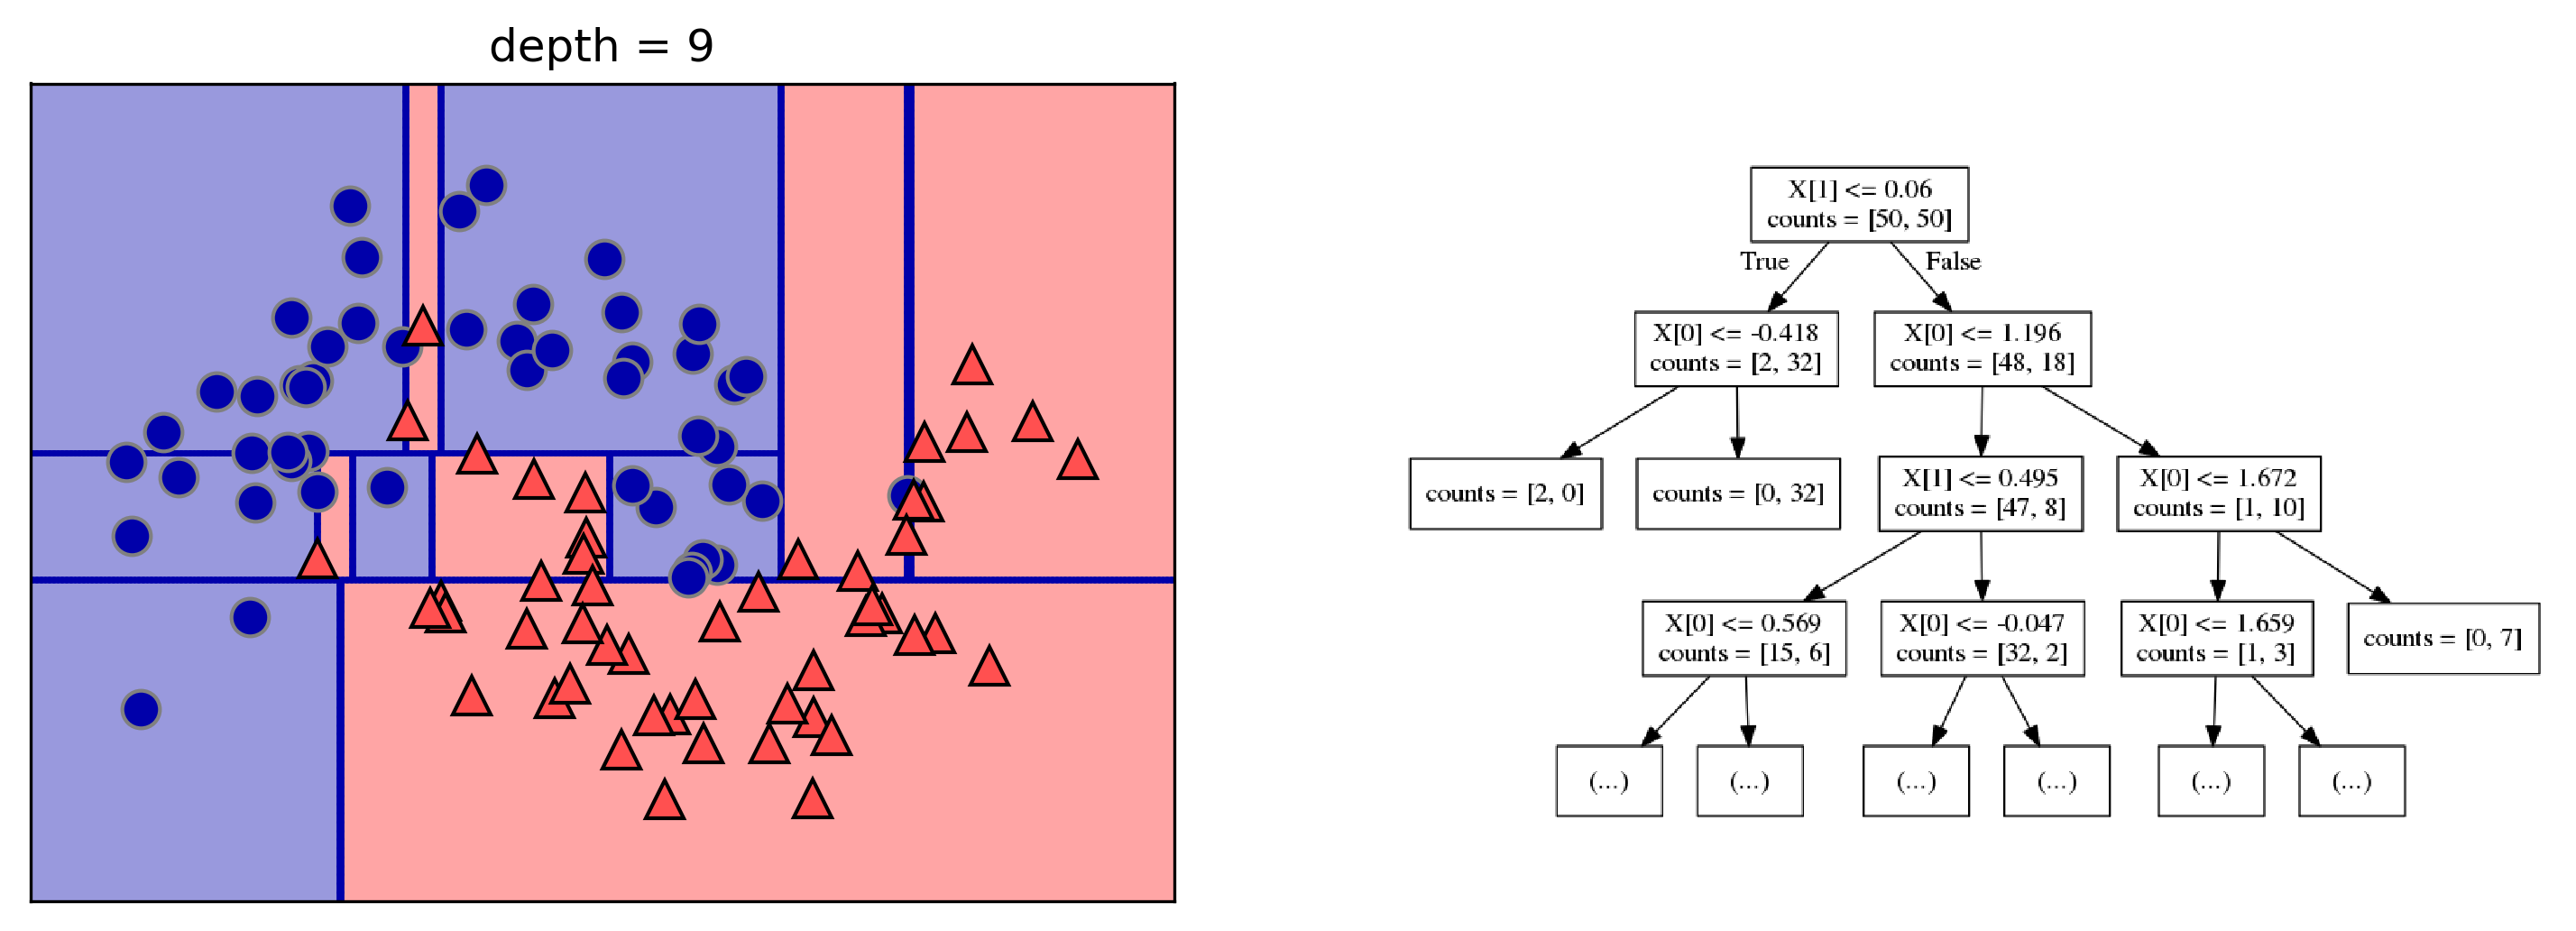

In [55]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Train set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Train set accuracy: 1.000
Test set accuracy: 0.937


Let's do pre-pruning now

In [56]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Train set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Train set accuracy: 0.988
Test set accuracy: 0.951


In [57]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

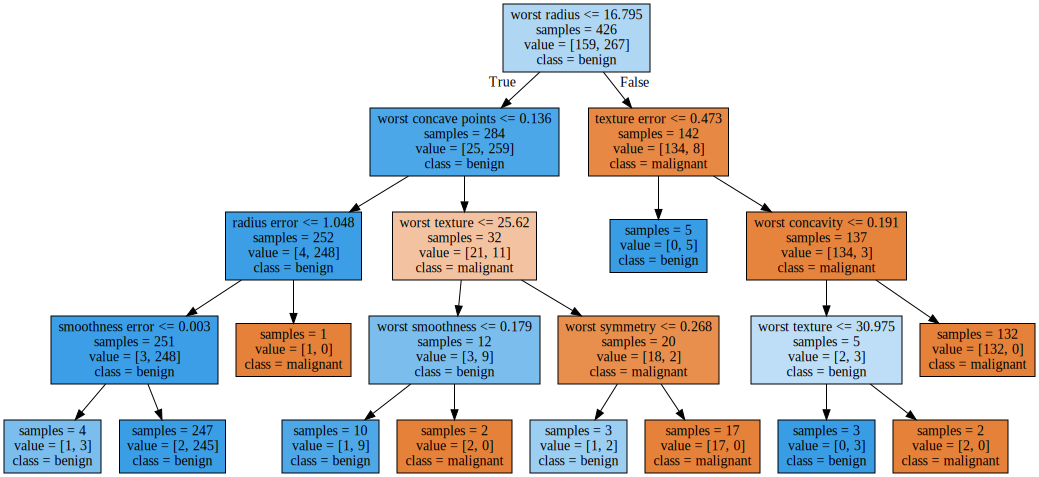

In [58]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [59]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [60]:
for name, score in zip(cancer["feature_names"], tree.feature_importances_):
    print("{:<25}: {:.6f}".format(name, score))

mean radius              : 0.000000
mean texture             : 0.000000
mean perimeter           : 0.000000
mean area                : 0.000000
mean smoothness          : 0.000000
mean compactness         : 0.000000
mean concavity           : 0.000000
mean concave points      : 0.000000
mean symmetry            : 0.000000
mean fractal dimension   : 0.000000
radius error             : 0.010197
texture error            : 0.048398
perimeter error          : 0.000000
area error               : 0.000000
smoothness error         : 0.002416
compactness error        : 0.000000
concavity error          : 0.000000
concave points error     : 0.000000
symmetry error           : 0.000000
fractal dimension error  : 0.000000
worst radius             : 0.726829
worst texture            : 0.045816
worst perimeter          : 0.000000
worst area               : 0.000000
worst smoothness         : 0.014158
worst compactness        : 0.000000
worst concavity          : 0.018188
worst concave points     : 0

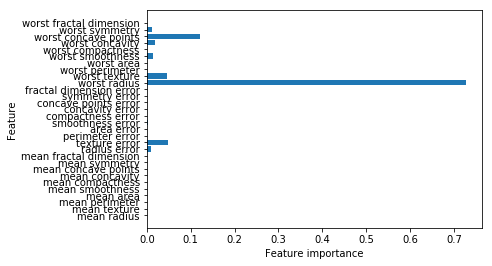

In [61]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


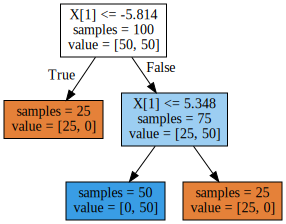

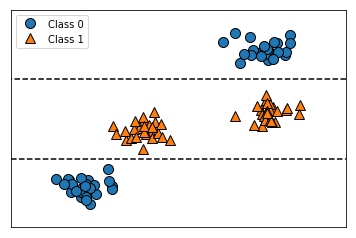

In [62]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

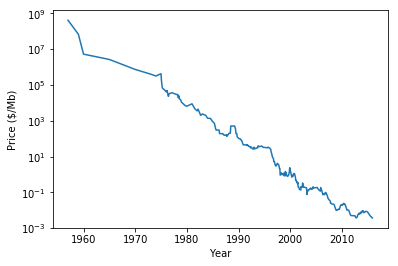

In [63]:
import pandas as pd
ram_prices = pd.read_csv("../data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mb)");

In [64]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on data
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

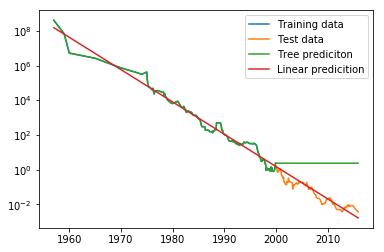

In [65]:
%matplotlib inline
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediciton")
plt.semilogy(ram_prices.date, price_lr, label="Linear predicition")
plt.legend()

### 4.1 Ensembles of Decision Trees

#### Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

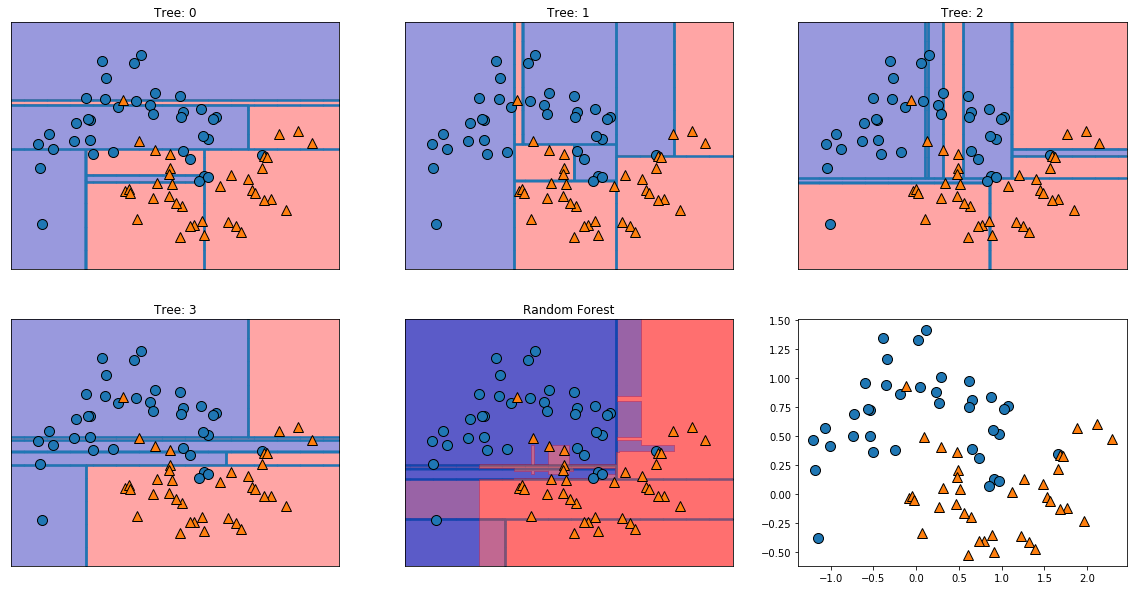

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree: {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, 1], alpha=.4)
axes[-1, 1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


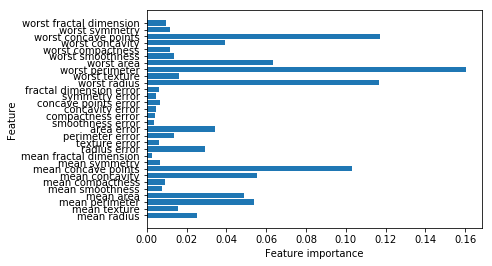

In [77]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(forest)

#### Gradient boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [74]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [75]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


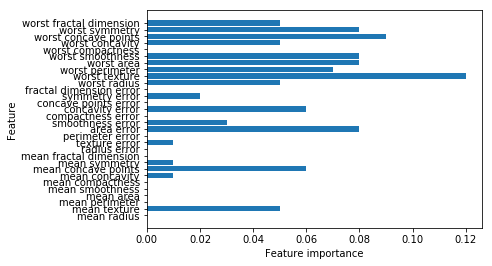

In [76]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(gbrt)

## 5. SVM

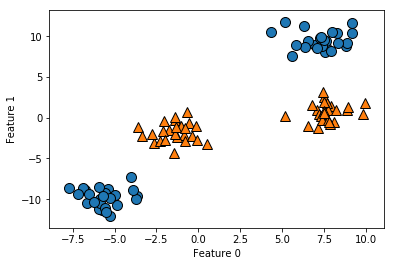

In [78]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

Linear model:

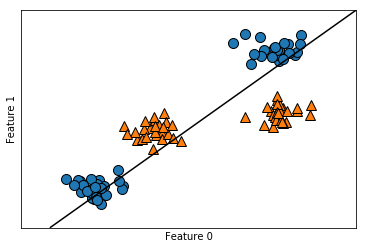

In [79]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

Text(0.5,0,'Feature 1 ** 2')

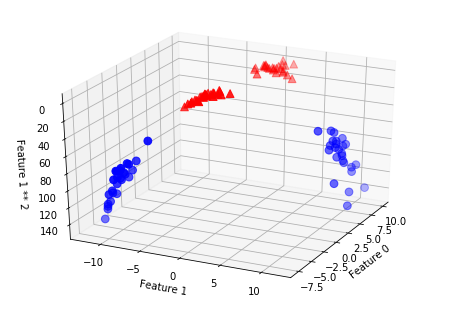

In [95]:
%matplotlib inline
X_new = np.hstack((X, X[:, 1:] ** 2))
X_new

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 1 ** 2')

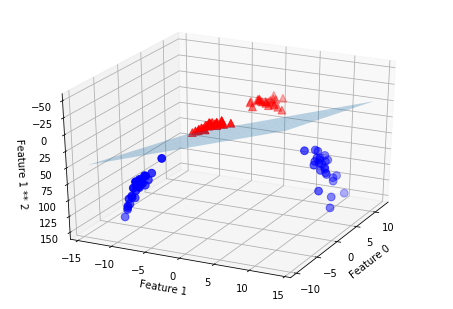

In [99]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 1 ** 2');

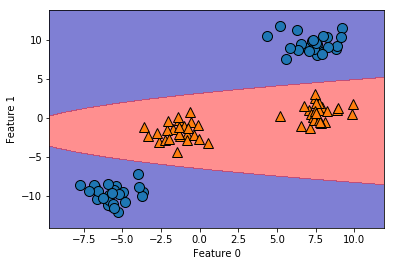

In [103]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

#### Kernel trick

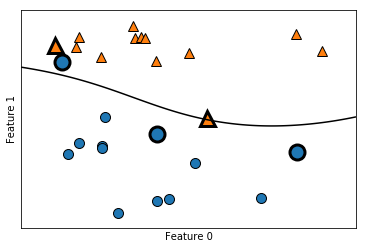

In [105]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# place support vectors to the plot
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

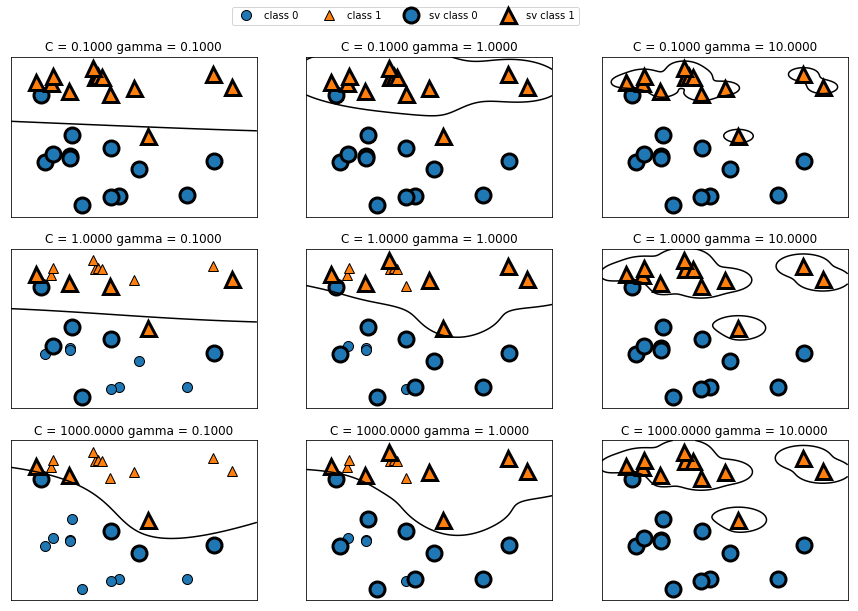

In [107]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2));

SVM with RBF kernel:

In [108]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.629


As you can see below, data values have a different scales for different features

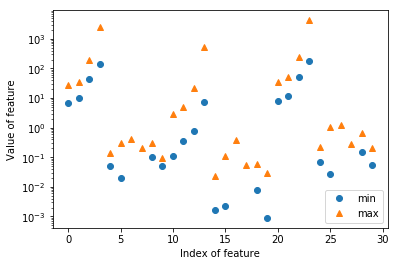

In [109]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Index of feature")
plt.ylabel("Value of feature")
plt.yscale("log");

### Data preprocessing for SVM

In [110]:
# calculate a min value for each feature of the training set
min_on_training = X_train.min(axis=0)
# calculate a range (max - min) for each feature of the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# calculate a scaled (from 0 to 1) value for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum value for each feature:\n", X_train_scaled.min(axis=0))
print("Maximum value for each feature:\n", X_train_scaled.max(axis=0))

Minimum value for each feature:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum value for each feature:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [111]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [113]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [114]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972
